In [1]:
#Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import linregress
import time
from datetime import datetime

In [28]:
#import raw data csv

input_data_file = "/Users/bennetyousuf/Desktop/BCS/ProjectOne-MentalHealthinTech/RAW DATA/SURVEY RAW DATA 2_CSV.CSV"

# Read in file and store in Pandas data frame
survey_data_df = pd.read_csv(input_data_file)
survey_data_df 

#Need to drop responses of individuals who do not work in the tech industry (question 3)

# tech_mental_health = survey_data_df.loc[survey_data_df["3_TECH_ORG"]== 1, :]
# tech_mental_health 


# ideal_cities_df = weather_df.loc[(weather_df["Max Temp"] > 70) & (weather_df["Max Temp"] < 80) & (weather_df["Cloudiness"] == 0) & (weather_df["Wind Speed"] <10), :]


,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,...,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,...,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [ ]:
# Filter 

In [9]:
#1. Analysis of Question 4 - How many employers provide mental health benefits across all 4 years
#How many employees answered this question - 1463
employers_who_provide_mental_health_benefits= survey_data_df["4_MH_BEN_PROVIDED"].count()
employers_who_provide_mental_health_benefits

1463

In [11]:
#1..#Analysis of Question 4 - How many employers provide mental health benefits
#What was the breakdown of answers for this quesion of the 1463 that did answer aross all 4 years
employers_who_provide_mental_health_benefits= survey_data_df["4_MH_BEN_PROVIDED"].value_counts()
employers_who_provide_mental_health_benefits

Yes                               800
I don't know                      389
No                                203
Not eligible for coverage / NA     71
Name: 4_MH_BEN_PROVIDED, dtype: int64

<AxesSubplot:title={'center':'Employers Who Provide Mental Health Benefits'}>

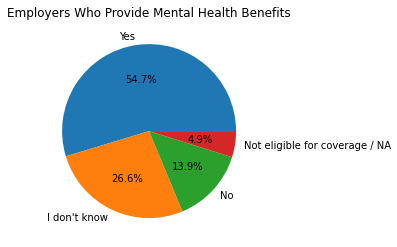

In [12]:
# 1.Analysis of Question 4 - How many employers provide mental health benefits
#What was the breakdown of answers for this quesion of the 1463 that did answer aross all 4 years

employers_who_provide_mental_health_benefits= survey_data_df["4_MH_BEN_PROVIDED"].value_counts()
employers_who_provide_mental_health_benefits.plot(kind ="pie", ylabel = "", title ="Employers Who Provide Mental Health Benefits",autopct="%1.1f%%") 


In [20]:
#1. Analysis of Question 4 - How many employers provide mental health benefits *yearly* breakdown
#come back to how to create yearly data frame when we cant use groupby
yearly_employers_who_provide_mental_health_benefits = survey_data_df.groupby(["YEAR","4_MH_BEN_PROVIDED"]).count()
yearly_employers_who_provide_mental_health_benefits

11_IMPORTANCE_EMPLOY_PHYS_HEALTH  \
YEAR 4_MH_BEN_PROVIDED                                                  
2017 I don't know                                                   1   
     No                                                             1   
     Not eligible for coverage / NA                                 1   
     Yes                                                            1   
2018 I don't know                                                   1   
     No                                                             1   
     Not eligible for coverage / NA                                 1   
     Yes                                                            1   
2019 I don't know                                                   1   
     No                                                             1   
     Not eligible for coverage / NA                                 1   
     Yes                                                            1   
2020 I don't know                                                   1   
     No                                                             1   
     Not eligible for coverage / NA                                 1   
     Yes                                                            1   

                                     12_IMPORTANCE_EMPLOY_MENTAL_HEALTH  \
YEAR 4_MH_BEN_PROVIDED                                                    
2017 I don't know                                                     1   
     No                                                               1   
     Not eligible for coverage / NA                                   1   
     Yes                                                              1   
2018 I don't know                                                     1   
     No                                                               1   
     Not eligible for coverage / NA                                   1   
     Yes                                                              1   
2019 I don't know                                                     1   
     No                                                               1   
     Not eligible for coverage / NA                                   1   
     Yes                                                              1   
2020 I don't know                                                     1   
     No                                                               1   
     Not eligible for coverage / NA                                   1   
     Yes                                                              1   

                                     19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER  \
YEAR 4_MH_BEN_PROVIDED                                                        
2017 I don't know                                                         1   
     No                                                                   1   
     Not eligible for coverage / NA                                       1   
     Yes                                                                  1   
2018 I don't know                                                         1   
     No                                                                   1   
     Not eligible for coverage / NA                                       1   
     Yes                                                                  1   
2019 I don't know                                                         1   
     No                                                                   1   
     Not eligible for coverage / NA                                       1   
     Yes                                                                  1   
2020 I don't know                                                         1   
     No                                                                   1   
     Not eligible for coverage / NA                                       1   
     Yes                    

In [ ]:
#2.Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers? 
# Main - Stacked bar chart level of comfort disucssing each year
# Main - Stacked bar chart actually disuccsing each year
# TBD if we see higher number of yeses in comfort are high, lets see if we can plot regression of number of yes in comfort vs number of yes in discussion
#stacked bar chart  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

#Level of comfort people have discussing mental health with employers across each year (Question 9) - Stacked Bar Chart

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

# #Bar and Pie Charts using Pandas
​
count_drug_regimen = unique_mice_df["Drug Regimen"].value_counts()
count_drug_regimen_df =count_drug_regimen
count_drug_regimen_df.plot(kind = "bar", title = "Total Measurements per Drug Regimen", xlabel="Drug Regimen", ylabel= "Total Measurements of Drug Regimen")




#Formatting for stacked bar chart
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed,
#                    'lifespan': lifespan}, index=index)
# ax = df.plot.bar(rot=0) 

# ax = df.plot.bar(stacked=True)


In [ ]:
#2.Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers? 
#Level of comfort people have discussing mental health with employers across each year (Question 10) - Stacked Bar Chart

In [ ]:
#2.Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers? 
#Regression TBD 

In [ ]:
#3 Do those that have mental disorders in tech ( question 15) feel as though they are supported in the tech industry ( question 19)? 
#Create data frame of those who answer yes to answer 15 (using .loc from the original clean data frame surey_data_df return “Yes” then index by question 19 “level of support”
#Gives us the data frame to work with (Tom)
#note: at aggregate level, not broken down by year



In [ ]:
#3. Do those that have mental disorders in tech (15) feel as though they are supported in the tech industry (19)? 
#Plot pie chart "Percentage of Individuals with mental health disorders that feel supported". No need to bin because range 1-5


In [ ]:
#Do those that have mental disorders in tech (15) feel as though they are supported in the tech industry (19)? 
#Regression TBD


In [ ]:
# #2. Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers?


# IMPORTANCE_EMPLOY_PHYS_HEALTH= survey_data_df["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"].value_counts()
# IMPORTANCE_EMPLOY_PHYS_HEALTH

# # year_2017_health_type = survey_data_df["Year"] =="2017"
# # result_2017= survey_df.loc[year_2017_health_type]
# # mouse_y793= capomulin_table.loc[capomulin_table["Mouse ID"]=="y793"]
# # plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
# # plt.xlabel("Timepoint (days)")
# # plt.ylabel("Tumor Volume (mm3)")
# # plt.title("Capomulin treatment of mouse y793")
# # plt.show()year_2017_health_type